In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
qc=QuantumCircuit(13,5)

In [3]:
#Initializing A and B to|0000>+|0111>/root 2  and  |0111>+|1000>/root2
qc.h(0)
qc.cx(0,4)
qc.cx(0,7)

In [4]:
qc.h(1)
qc.cx(1,5)
qc.cx(1,8)
qc.x(11)
qc.cx(1,11)

In [5]:
#Quantum adder
qc.ccx(0,1,2)
qc.cx(0,1)
qc.ccx(1,3,2)
qc.cx(1,3)

qc.ccx(4,5,6)
qc.cx(4,5)
qc.ccx(5,2,6)
qc.cx(5,2)

qc.ccx(7,8,9)
qc.cx(7,8)
qc.ccx(8,6,9)
qc.cx(8,6)

qc.ccx(10,11,12)
qc.cx(10,11)
qc.ccx(11,9,12)
qc.cx(11,9)

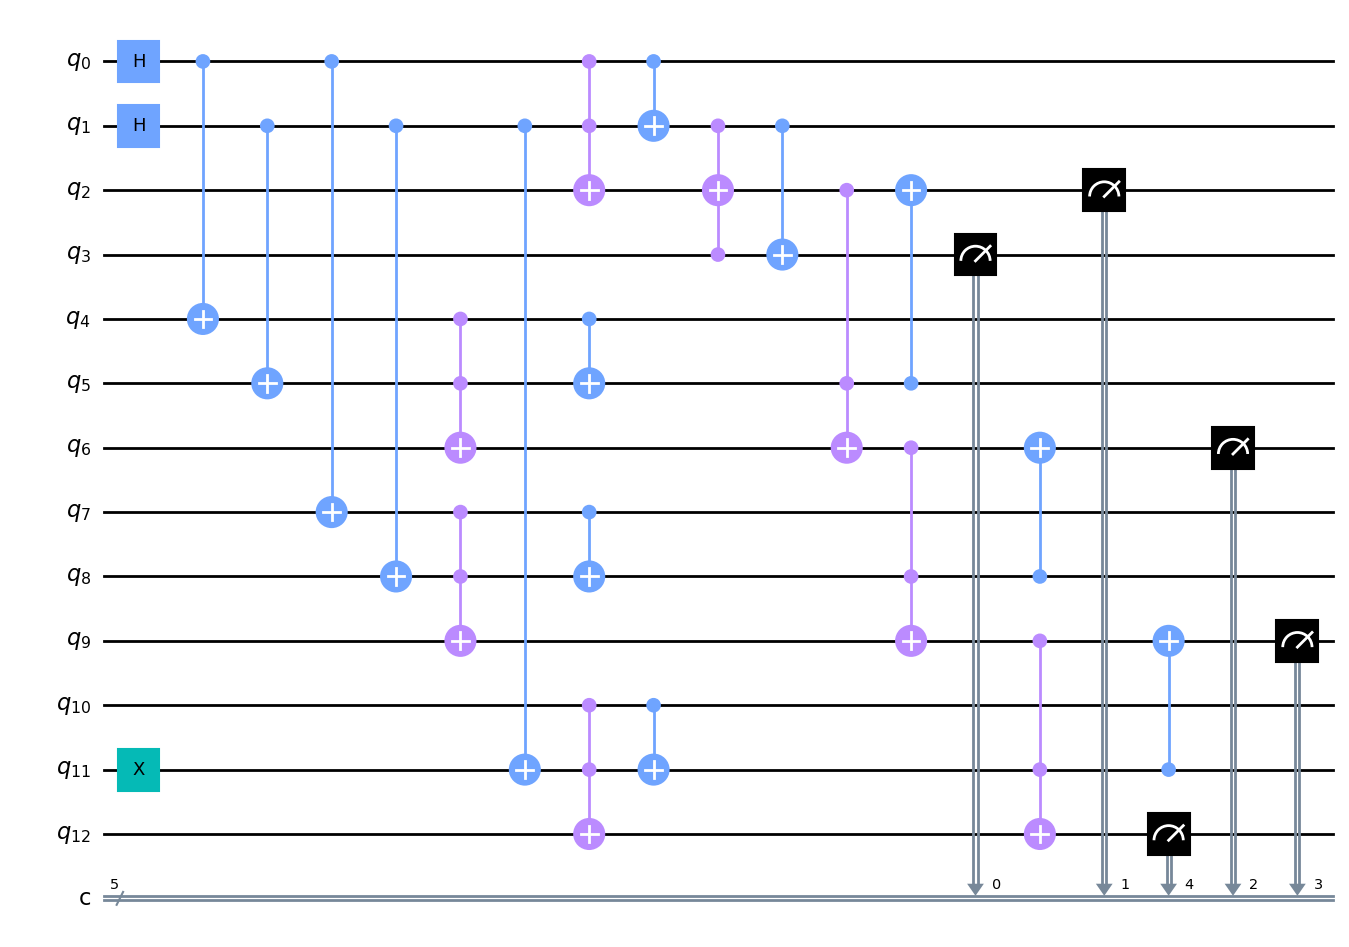

In [6]:
#Measurement and final circuit
qc.measure(3,0)
qc.measure(2,1)
qc.measure(6,2)
qc.measure(9,3)
qc.measure(12,4)

qc.draw('mpl')

In [7]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

{'01000': 237, '01110': 265, '00111': 275, '01111': 247}


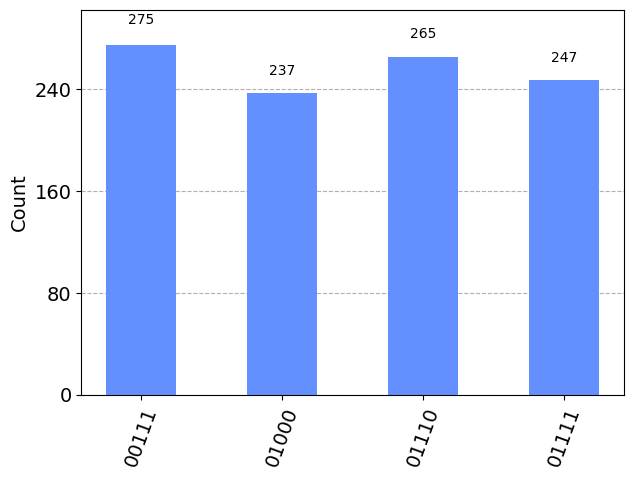

In [8]:
plot_histogram(counts)